In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
train_data = pd.read_csv('Nedvig.csv', delimiter=';', encoding='cp1251')
test_data = pd.read_csv('Nedvig_test.csv', delimiter=';', encoding='cp1251')

In [5]:
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

In [6]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [7]:
columns_to_convert = ['Число комнат', 'Общая', 'Жилая', 'Кухня', 'Цена, тыс. руб.']
train_data[columns_to_convert] = train_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')
test_data[['Число комнат', 'Общая', 'Жилая', 'Кухня']] = test_data[['Число комнат', 'Общая', 'Жилая', 'Кухня']].apply(pd.to_numeric, errors='coerce')


In [8]:
y_train = train_data['Цена, тыс. руб.']
X_train = train_data[['Число комнат', 'Общая', 'Жилая', 'Кухня']]


In [9]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_split, y_train_split)
y_pred_ridge = ridge.predict(X_test_split)
mse_ridge = mean_squared_error(y_test_split, y_pred_ridge)
r2_ridge = r2_score(y_test_split, y_pred_ridge)

In [11]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_split, y_train_split)
y_pred_lasso = lasso.predict(X_test_split)
mse_lasso = mean_squared_error(y_test_split, y_pred_lasso)
r2_lasso = r2_score(y_test_split, y_pred_lasso)

In [12]:
X_new = test_data[['Число комнат', 'Общая', 'Жилая', 'Кухня']]
test_data['Предсказанная цена Ridge'] = ridge.predict(X_new)
test_data['Предсказанная цена Lasso'] = lasso.predict(X_new)

In [13]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

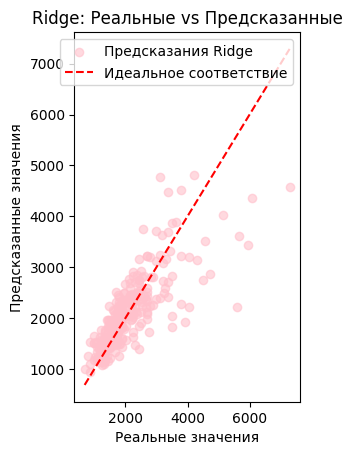

In [15]:
plt.subplot(1, 2, 1)
plt.scatter(y_test_split, y_pred_ridge, color='pink', alpha=0.6, label='Предсказания Ridge')
plt.plot([y_test_split.min(), y_test_split.max()], [y_test_split.min(), y_test_split.max()], 'r--', label='Идеальное соответствие')
plt.title('Ridge: Реальные vs Предсказанные')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()

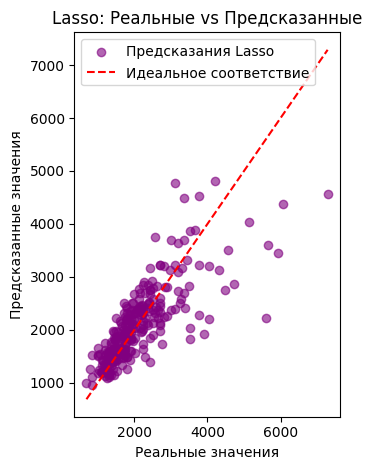

In [17]:
plt.subplot(1, 2, 2)
plt.scatter(y_test_split, y_pred_lasso, color='purple', alpha=0.6, label='Предсказания Lasso')
plt.plot([y_test_split.min(), y_test_split.max()], [y_test_split.min(), y_test_split.max()], 'r--', label='Идеальное соответствие')
plt.title('Lasso: Реальные vs Предсказанные')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
print("Результаты Ridge-регрессии:")
print(f'Среднеквадратичная ошибка (MSE): {mse_ridge}')
print(f'Коэффициент детерминации (R²): {r2_ridge}')
print(f'Коэффициенты модели Ridge: {ridge.coef_}')

print("\nРезультаты Lasso-регрессии:")
print(f'Среднеквадратичная ошибка (MSE): {mse_lasso}')
print(f'Коэффициент детерминации (R²): {r2_lasso}')
print(f'Коэффициенты модели Lasso: {lasso.coef_}')


Результаты Ridge-регрессии:
Среднеквадратичная ошибка (MSE): 340991.4351869146
Коэффициент детерминации (R²): 0.6159333972352399
Коэффициенты модели Ridge: [51.26386656 16.80836032 13.29619664 31.91928341]

Результаты Lasso-регрессии:
Среднеквадратичная ошибка (MSE): 340977.28466490353
Коэффициент детерминации (R²): 0.6159493352980627
Коэффициенты модели Lasso: [51.21408463 16.81341277 13.29039088 31.90537364]
